## Task 4
Carlos Andres Daza Rachen
J4134C

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize, least_squares, differential_evolution, dual_annealing
from tabulate import tabulate
import urllib
import os
import random
import math
from tqdm import tqdm

## Stochastic and Metaheuristic Algorithms

In [3]:
def generate_noisy():
    
    x = []
    y = []

    def fx(x):        
        return 1/(x**2 - 3*x + 2)

    for k in range(1000):
        xk = 3*k/1000
        x.append(xk)
        fxk = fx(xk)
        delta = np.random.normal(0,1)

        if fxk < -100:            
            y.append(-100 + delta)
        elif fxk >= -100 and fxk <= 100:            
            y.append(fxk + delta)
        else:            
            y.append(100 + delta)
        
    return np.array(x), np.array(y)

def _rational(x, a, b, c, d):
    return (a*x + b) / (x**2 + c*x + d)

def rational(init_point, *args):
    a, b, c, d = init_point
    x, y = args[0], args[1]
    return np.sum((_rational(x, a, b, c, d) - y)**2)

def rational_resid(init_point, *args):
    a, b, c, d = init_point
    x, y = args[0], args[1]

    return abs(_rational(x, a, b, c, d) - y)

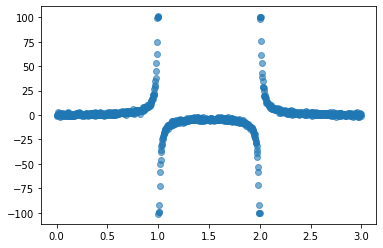

In [4]:
x,y = generate_noisy()
error = 0.001
init_point = [1,-1,-1,1]

plt.scatter(x, y, alpha=0.6)
plt.show()

### Nelder-Mead

In [5]:
nelder = minimize(rational, init_point, args=(x, y), method='nelder-mead', tol=error, options={'disp': True})
na, nb, nc, nd = nelder['x']
print(nelder['x'])

[ 1.00473852 -2.00900009 -3.99909821  3.99821269]


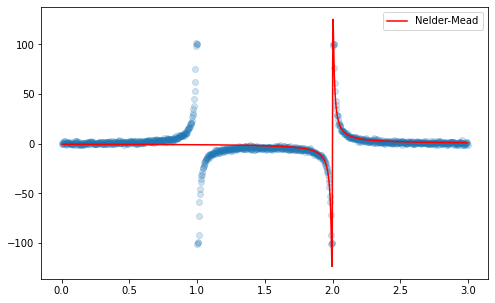

In [6]:
plt.figure(figsize=(8,5))
plt.scatter(x, y, alpha=0.2)
plt.plot(x, _rational(x, na, nb, nc, nd), label='Nelder-Mead', color='red')
plt.legend()
plt.show()

### Levenberg-Marquadt

In [7]:
levenberg = least_squares(rational_resid, init_point, args=(x, y), method='lm', xtol=error)
la, lb, lc, ld = levenberg['x']
print(f'Current function value: {levenberg["cost"]}')
print(f'Function Calls: {levenberg["nfev"]}')
print(levenberg['x'], end='\n\n')


Current function value: 68279.04781971812
Function Calls: 205
[-1.00106443  1.00152207 -2.00080106  1.00081701]



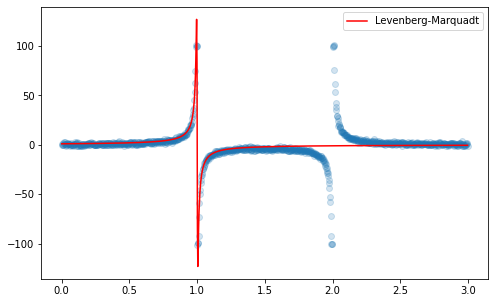

In [8]:
plt.figure(figsize=(8,5))
plt.scatter(x, y, alpha=0.2)
plt.plot(x, _rational(x, la, lb, lc, ld), label='Levenberg-Marquadt', color='red')
plt.legend()
plt.show()

### Differential Evolution

In [9]:
bounds = [(-7, 4), (-7, 4), (-7, 4), (-7, 4)]

In [10]:
evolution = differential_evolution(rational, bounds, args=(x, y), tol=error)
ea, eb, ec, ed = evolution['x']
print(evolution)

     fun: 136669.02470634138
     jac: array([ 376104.39113744,  187398.58465073,  716657.05908243,
       -242488.85312806])
 message: 'Optimization terminated successfully.'
    nfev: 9000
     nit: 147
 success: True
       x: array([ 1.01509888, -2.02968701, -3.99903283,  3.99808232])


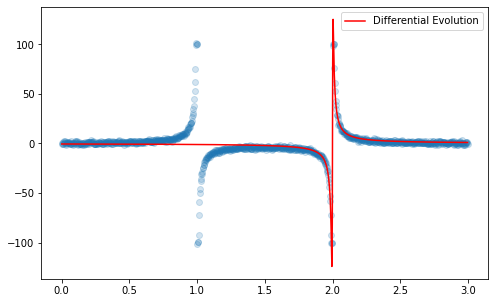

In [11]:
plt.figure(figsize=(8,5))
plt.scatter(x, y, alpha=0.2)
plt.plot(x, _rational(x, ea, eb, ec, ed), label='Differential Evolution', color='red')
plt.legend()
plt.show()

### Simulated Annealing

In [12]:
annealing = dual_annealing(rational, bounds, args=(x, y))
aa, ab, ac, ad = annealing['x']
print(annealing)

     fun: 194816.93876954314
 message: ['Maximum number of iteration reached']
    nfev: 9051
    nhev: 0
     nit: 1000
    njev: 210
  status: 0
 success: True
       x: array([-0.20303219,  0.204542  , -2.00835595,  1.00835993])


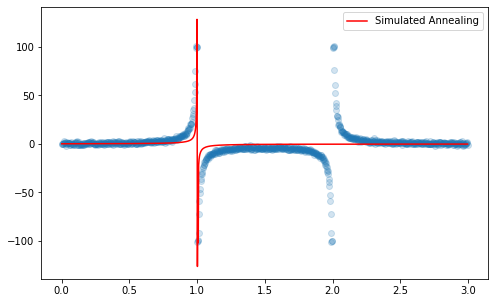

In [13]:
plt.figure(figsize=(8,5))
plt.scatter(x, y, alpha=0.2)
plt.plot(x, _rational(x, aa, ab, ac, ad), label='Simulated Annealing', color='red')
plt.legend()
plt.show()

### Report Table

In [14]:
headers = ['a', 'b', 'c', 'd', 'Fx value', 'Iterations', 'Fx calls']
index = ['Differential Evolution', 'Simulated Annealing', 'Nelder-Mead', 'Levenberg-Marquadt']
table = [
    [ea, eb, ec, ed, evolution['fun'], evolution['nit'], evolution['nfev']],
    [aa, ab, ac, ad, annealing['fun'], annealing['nit'], annealing['nfev']],
    [na, nb, nc, nd, nelder['fun'], nelder['nit'], nelder['nfev']],    
    [la, lb, lc, ld, levenberg['cost'], levenberg['nfev'], levenberg['nfev']],
]

print('Table Comparison')
print(tabulate(table, headers=headers, showindex=index))

Table Comparison
                                a          b         c        d    Fx value    Iterations    Fx calls
----------------------  ---------  ---------  --------  -------  ----------  ------------  ----------
Differential Evolution   1.0151    -2.02969   -3.99903  3.99808      136669           147        9000
Simulated Annealing     -0.203032   0.204542  -2.00836  1.00836      194817          1000        9051
Nelder-Mead              1.00474   -2.009     -3.9991   3.99821      136659           467         801
Levenberg-Marquadt      -1.00106    1.00152   -2.0008   1.00082       68279           205         205


### Plot Comparison

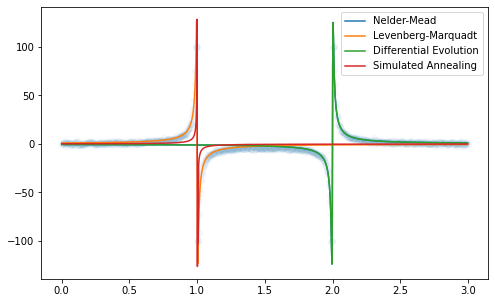

In [15]:
plt.figure(figsize=(8,5))
plt.scatter(x, y, alpha=0.03)
plt.plot(x, _rational(x, na, nb, nc, nd), label='Nelder-Mead')
plt.plot(x, _rational(x, la, lb, lc, ld), label='Levenberg-Marquadt')
plt.plot(x, _rational(x, ea, eb, ec, ed), label='Differential Evolution')
plt.plot(x, _rational(x, aa, ab, ac, ad), label='Simulated Annealing')
plt.legend()
plt.show()

## Travelling Salesman Problem

In [16]:
file_dist = 'wg59_dist.txt'
file_coord = 'wg59_xy.txt'

if not os.path.exists(file_dist):
    urllib.request.urlretrieve('https://people.sc.fsu.edu/~jburkardt/datasets/cities/' + file_dist, file_dist)

if not os.path.exists(file_coord):
    urllib.request.urlretrieve('https://people.sc.fsu.edu/~jburkardt/datasets/cities/' + file_coord, file_coord)

In [17]:
with open(file_dist, 'r') as f:
    dist = f.readlines()

dist = np.loadtxt(dist)
dist

array([[  0., 146., 145., ...,  42., 101., 116.],
       [146.,   0.,  35., ..., 129., 106.,  45.],
       [145.,  35.,   0., ..., 119.,  81.,  29.],
       ...,
       [ 42., 129., 119., ...,   0.,  60.,  90.],
       [101., 106.,  81., ...,  60.,   0.,  60.],
       [116.,  45.,  29., ...,  90.,  60.,   0.]])

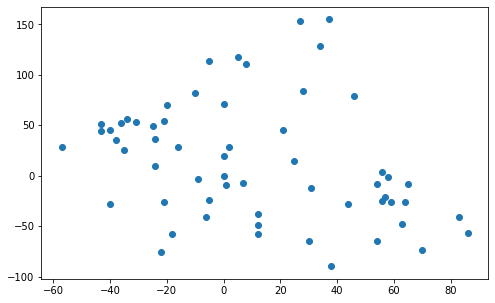

In [18]:
with open(file_coord, 'r') as c:
    coord = c.readlines()

coord = np.loadtxt(coord)

# plot coordinate
plt.figure(figsize=(8,5))
plt.scatter(coord[:,0], coord[:,1])
plt.show()

In [19]:
def sum_dist(tour, dist=dist):
    sum = 0
    for i in range(len(tour)-1):        
        sum += dist[tour[i]][tour[i+1]]

    # compute last city with first city distance
    sum += dist[tour[-1]][tour[0]]

    return sum

In [20]:
def simulate(coord, max_temp=100000):

    first_tour = []
    first_dist = 0
    first_iter = True


    n = len(coord)
    tour = random.sample(range(n), n)    

    for temp in tqdm(np.linspace(0.0001, 0.0005, max_temp)[::-1]):
        curr_dist = sum_dist(tour)
        
        # generate new tour
        i, j = sorted(random.sample(range(n), 2))    
        new_tour = tour.copy()
        new_tour[i], new_tour[j] = new_tour[j], new_tour[i]
        new_dist = sum_dist(new_tour)

        # save first iteration
        if first_iter:
            first_tour = new_tour.copy()
            first_dist = new_dist
            first_iter = False

        if (np.exp(curr_dist - new_dist) / temp) > random.random():
            tour = new_tour.copy()
    
    print('Simulation done.')
    print('----------------')
    print(f'First tour: {first_tour}')
    print(f'First distance: {first_dist}')
    print(f'Best tour: {tour}')
    print(f'Shortest distance: {sum_dist(tour)}')

    return first_tour, first_dist, tour, sum_dist(tour)

In [21]:
f_tour, f_dist, b_tour, b_dist = simulate(coord, 10000000)

100%|██████████| 10000000/10000000 [12:59<00:00, 12824.83it/s]

Simulation done.
----------------
First tour: [46, 5, 15, 20, 42, 29, 2, 37, 56, 55, 34, 58, 14, 4, 47, 49, 30, 32, 6, 31, 22, 12, 35, 13, 1, 41, 57, 3, 50, 48, 54, 45, 33, 0, 26, 17, 43, 8, 18, 9, 25, 21, 40, 38, 24, 44, 51, 27, 52, 10, 7, 53, 39, 28, 16, 36, 11, 19, 23]
First distance: 5605.0
Best tour: [53, 58, 47, 1, 9, 36, 8, 26, 51, 3, 37, 24, 55, 21, 39, 5, 41, 2, 46, 48, 40, 22, 30, 16, 35, 15, 57, 11, 12, 54, 6, 14, 28, 56, 27, 10, 52, 19, 4, 43, 32, 29, 31, 50, 0, 20, 17, 25, 42, 23, 38, 18, 33, 49, 45, 34, 44, 13, 7]
Shortest distance: 1180.0


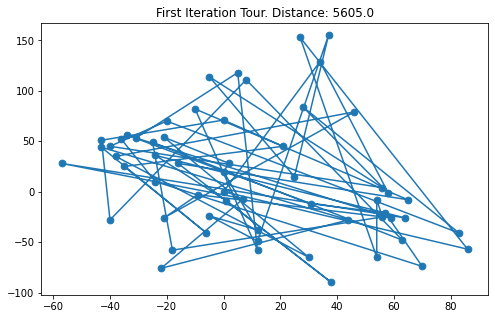

In [22]:
n = len(coord)

# plot first iteration
plt.figure(figsize=(8,5))
plt.title(f'First Iteration Tour. Distance: {f_dist}')
plt.scatter(coord[:,0], coord[:,1], s=45)
plt.plot([coord[f_tour[i % n]][0] for i in range(n+1)], [coord[f_tour[i % n]][1] for i in range(n+1)])
plt.show()

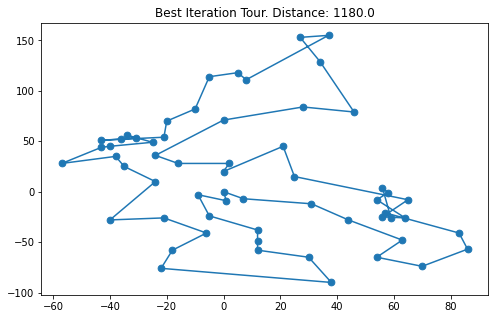

In [23]:
n = len(coord)

# plot first iteration
plt.figure(figsize=(8,5))
plt.title(f'Best Iteration Tour. Distance: {b_dist}')
plt.scatter(coord[:,0], coord[:,1], s=45)
plt.plot([coord[b_tour[i % n]][0] for i in range(n+1)], [coord[b_tour[i % n]][1] for i in range(n+1)])
plt.show()